In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from scipy import misc

## Load data

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(len(x_train),-1)
x_test = x_test.reshape(len(x_test),-1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


## Build Classifier

In [4]:
# TODO
# One thing that will play a huge role in this is changing the depth.. smaller depth equates to higher chance of 
# two images falling into the same node

In [5]:
RF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
RF.fit(x_train[:500], y_train[:500])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [6]:
count = 0.0
#sum(RF.predict(x_train[:500]) == y_train[:500])/500.0
sum(RF.predict(x_test) == y_test)/len(y_test)

0.77390000000000003

In [7]:
# Rows = Image index
# Columns = tree index
# final_nodes[i, j] = the leaf node that input i landed at for tree j
final_nodes = RF.apply(x_train[:500])
final_nodes

array([[ 5, 27, 36, ..., 57, 28, 23],
       [ 9, 56, 55, ..., 25, 11, 36],
       [ 5, 41, 36, ...,  5, 34, 16],
       ..., 
       [ 8, 31,  5, ...,  8, 22, 46],
       [28, 27, 36, ..., 12, 49, 15],
       [23, 50, 47, ..., 49, 13, 44]])

In [8]:
%%time
# TODO Optimize l8r
num_data = 500

num_trees = final_nodes.shape[1]
P = np.zeros((num_data,num_data))

# For each tree
for j in range(100):
    tmp_P = []
    for i in range(num_data):        
        s = np.array([int(final_nodes[i][j] == leaf) for leaf in final_nodes[:, j]])
        tmp_P.append(s)
    P += np.array(tmp_P)

CPU times: user 29.1 s, sys: 248 ms, total: 29.4 s
Wall time: 30.3 s


In [9]:
row_sum = np.sum(P, axis=1)
P_normed = P / row_sum

In [10]:
P

array([[ 100.,    2.,   10., ...,    3.,   12.,    4.],
       [   2.,  100.,    0., ...,    1.,    2.,    0.],
       [  10.,    0.,  100., ...,    5.,    8.,    0.],
       ..., 
       [   3.,    1.,    5., ...,  100.,    4.,   11.],
       [  12.,    2.,    8., ...,    4.,  100.,    4.],
       [   4.,    0.,    0., ...,   11.,    4.,  100.]])

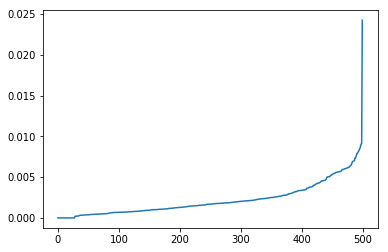

In [11]:
plt.ylim=1
plt.plot(np.arange(500), sorted(P_normed[0,:]))
plt.show()